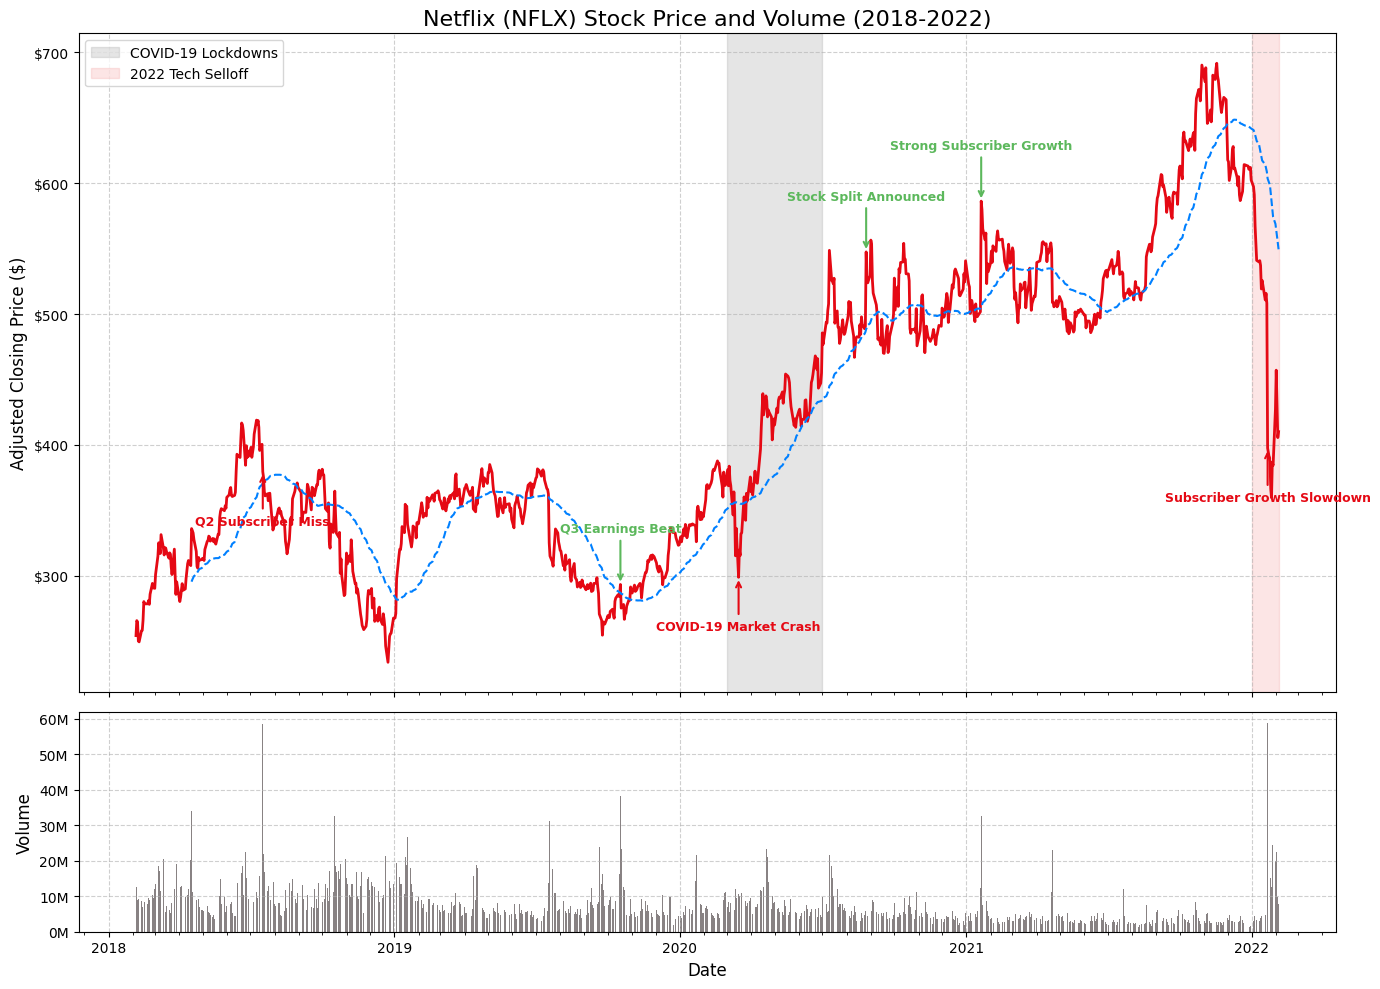

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np
from datetime import datetime

# Load the Netflix stock data
df = pd.read_csv(r'C:\Users\Aru\Downloads\archive\NFLX.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with two subplots (sharing the x-axis)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot the adjusted closing price
ax1.plot(df['Date'], df['Adj Close'], color='#E50914', linewidth=2)
ax1.set_ylabel('Adjusted Closing Price ($)', fontsize=12)
ax1.set_title('Netflix (NFLX) Stock Price and Volume (2018-2022)', fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', labelsize=10)

# Format y-axis as dollars
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:.0f}'))

# Plot the volume
ax2.bar(df['Date'], df['Volume'], color='#564d4f', alpha=0.7)
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', labelsize=10)

# Format x-axis to show years
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())

# Format y-axis for volume (in millions)
def millions(x, pos):
    return f'{x/1e6:.0f}M'
ax2.yaxis.set_major_formatter(FuncFormatter(millions))

# Key events that affected Netflix stock
events = [
    {'date': '2018-07-17', 'price': 379.48, 'event': 'Q2 Subscriber Miss', 'impact': 'negative'},
    {'date': '2019-10-17', 'price': 293.35, 'event': 'Q3 Earnings Beat', 'impact': 'positive'},
    {'date': '2020-03-16', 'price': 298.84, 'event': 'COVID-19 Market Crash', 'impact': 'negative'},
    {'date': '2020-08-26', 'price': 547.53, 'event': 'Stock Split Announced', 'impact': 'positive'},
    {'date': '2021-01-20', 'price': 586.34, 'event': 'Strong Subscriber Growth', 'impact': 'positive'},
    {'date': '2022-01-21', 'price': 397.50, 'event': 'Subscriber Growth Slowdown', 'impact': 'negative'}
]

# Add annotations for key events
for event in events:
    event_date = pd.to_datetime(event['date'])
    idx = df[df['Date'] == event_date].index
    
    if len(idx) > 0:
        idx = idx[0]
        event_price = df.loc[idx, 'Adj Close']
        color = '#E50914' if event['impact'] == 'negative' else '#5CB85C'
        
        # Add arrow and label to the plot
        arrow_y_offset = 30 if event['impact'] == 'positive' else -30
        text_y_offset = 40 if event['impact'] == 'positive' else -40
        
        ax1.annotate(
            event['event'],
            xy=(df.loc[idx, 'Date'], event_price),
            xytext=(df.loc[idx, 'Date'], event_price + text_y_offset),
            fontsize=9,
            color=color,
            weight='bold',
            ha='center',
            arrowprops=dict(arrowstyle='->', color=color, linewidth=1.5)
        )

# Highlight periods
# COVID-19 lockdown period (March 2020 - June 2020)
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2020-06-30')
ax1.axvspan(covid_start, covid_end, alpha=0.2, color='gray', label='COVID-19 Lockdowns')

# 2022 Tech Selloff
tech_selloff = pd.to_datetime('2022-01-01')
ax1.axvspan(tech_selloff, df['Date'].max(), alpha=0.2, color='lightcoral', label='2022 Tech Selloff')

# Add a legend
ax1.legend(loc='upper left', fontsize=10)

# Add grid to both plots
ax1.grid(True, linestyle='--', alpha=0.6)
ax2.grid(True, linestyle='--', alpha=0.6)

# Calculate 50-day moving average
df['MA50'] = df['Adj Close'].rolling(window=50).mean()

# Plot the moving average
ax1.plot(df['Date'], df['MA50'], color='#0080FF', linestyle='--', linewidth=1.5, label='50-Day MA')

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig('netflix_stock_analysis.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

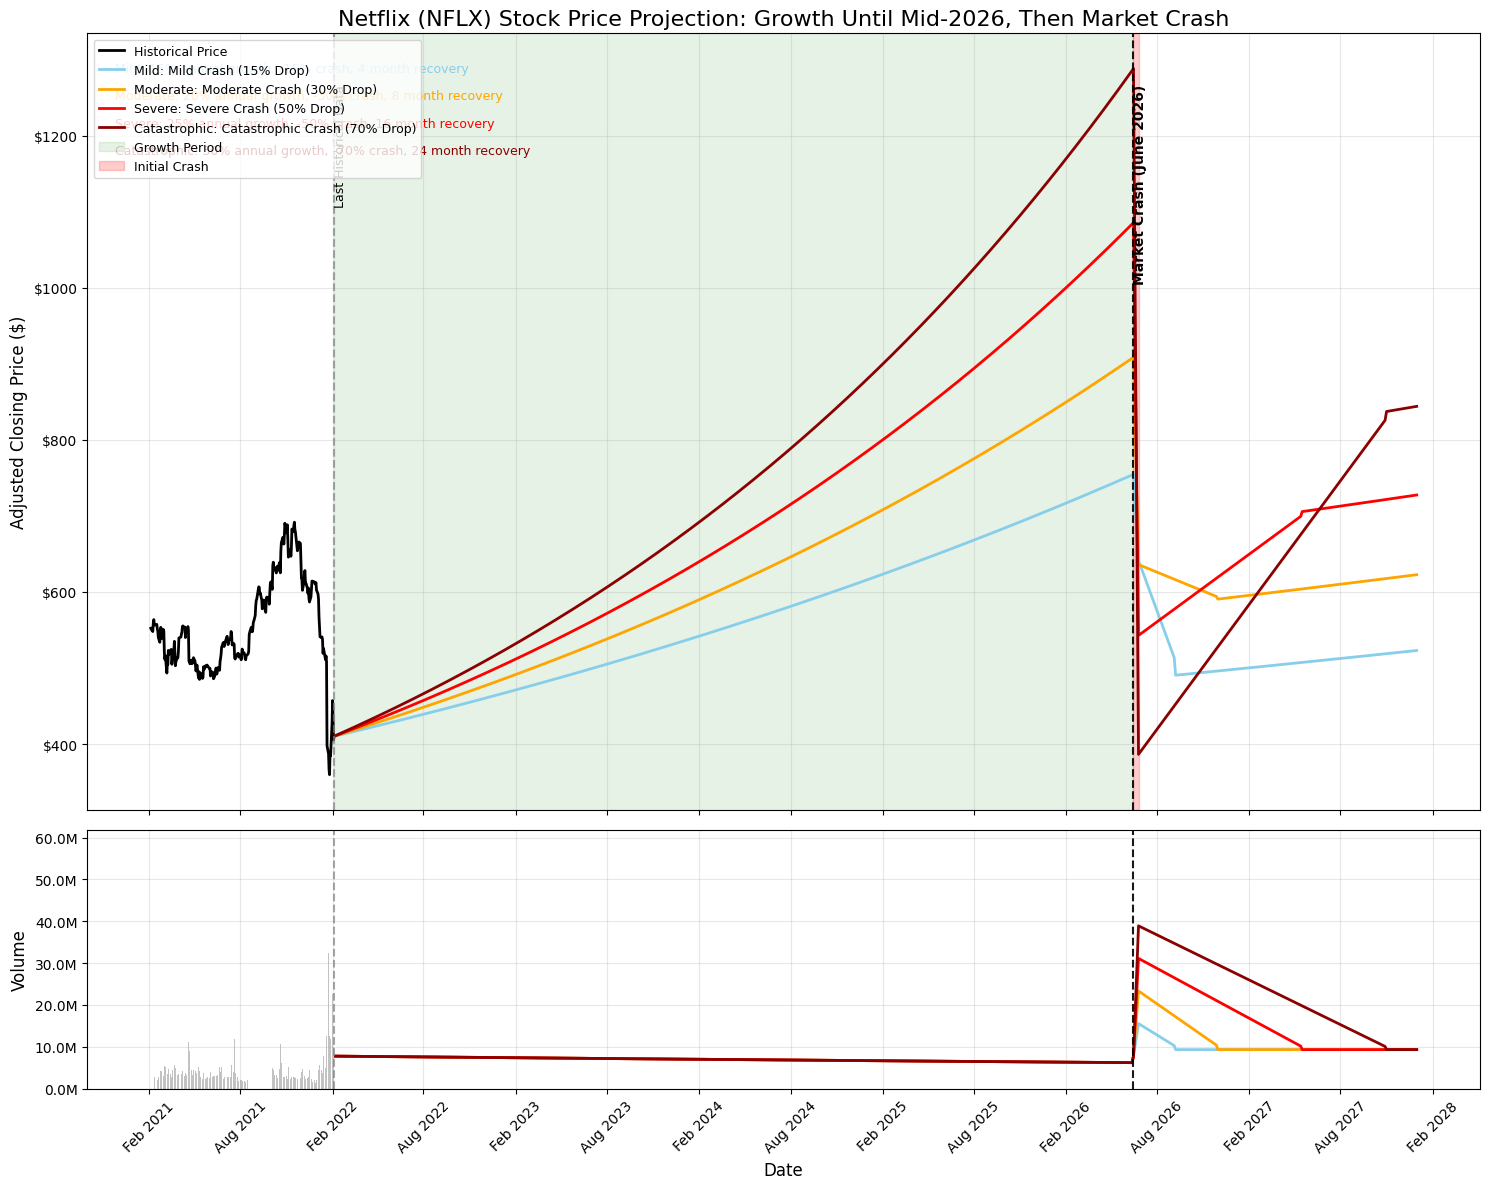

==== Growth Until Mid-2026, Then Crash Scenario Statistics ====

Mild Scenario (Mild Crash (15% Drop)):
  Peak Price Before Crash: $753.72 (83.8% growth from last historical price)
  Post-Crash Bottom: $627.02 (-16.8% drop from peak)
  Peak Volume During Crash: 15564800 (100.0% increase)
  End Price vs Peak: -30.6%
  End Price vs Starting Price: 27.5%
  Final Price: $522.98

Moderate Scenario (Moderate Crash (30% Drop)):
  Peak Price Before Crash: $907.14 (121.2% growth from last historical price)
  Post-Crash Bottom: $633.79 (-30.1% drop from peak)
  Peak Volume During Crash: 23347200 (200.0% increase)
  End Price vs Peak: -31.4%
  End Price vs Starting Price: 51.8%
  Final Price: $622.63

Severe Scenario (Severe Crash (50% Drop)):
  Peak Price Before Crash: $1083.56 (164.2% growth from last historical price)
  Post-Crash Bottom: $542.78 (-49.9% drop from peak)
  Peak Volume During Crash: 31129600 (300.0% increase)
  End Price vs Peak: -32.9%
  End Price vs Starting Price: 77.4%
  Fin

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

# Load the Netflix stock data
df = pd.read_csv(r'C:\Users\Aru\Downloads\archive\NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Add features that might help predict stock behavior during growth and crashes
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Year'] = df['Date'].dt.year

# Add moving averages for price and volume
df['MA20_Price'] = df['Adj Close'].rolling(window=20).mean()
df['MA50_Price'] = df['Adj Close'].rolling(window=50).mean()
df['MA200_Price'] = df['Adj Close'].rolling(window=200).mean()
df['MA20_Volume'] = df['Volume'].rolling(window=20).mean()

# Add volatility measures
df['Volatility_20'] = df['Adj Close'].rolling(window=20).std()
df['Volume_Volatility_20'] = df['Volume'].rolling(window=20).std()

# Add momentum indicators
df['Price_Change'] = df['Adj Close'].pct_change()
df['Volume_Change'] = df['Volume'].pct_change()
df['Price_Momentum'] = df['Price_Change'].rolling(window=14).mean()
df['Volume_Momentum'] = df['Volume_Change'].rolling(window=14).mean()

# Drop rows with NaN values created by moving averages
df = df.dropna()

# Select features for prediction
price_features = ['Open', 'High', 'Low', 'MA20_Price', 'MA50_Price', 'MA200_Price', 
                 'Volatility_20', 'Price_Momentum', 'Volume_Momentum']
                 
volume_features = ['Open', 'High', 'Low', 'Close', 'MA20_Volume', 
                  'Volume_Volatility_20', 'Price_Momentum', 'Volume_Momentum']

# Prepare training data
X_price = df[price_features]
y_price = df['Adj Close']

X_volume = df[volume_features]
y_volume = df['Volume']

# Standardize features
scaler_price = StandardScaler()
scaler_volume = StandardScaler()
X_price_scaled = scaler_price.fit_transform(X_price)
X_volume_scaled = scaler_volume.fit_transform(X_volume)

# Train models
price_model = LinearRegression()
price_model.fit(X_price_scaled, y_price)

volume_model = LinearRegression()
volume_model.fit(X_volume_scaled, y_volume)

# Get the last date in the dataset
last_date = df['Date'].max()

# Create future date range until the end of 2027 (to show post-crash recovery)
future_start = last_date + timedelta(days=1)
future_end = datetime(2027, 12, 31)
future_dates = pd.date_range(start=future_start, end=future_end, freq='D')
future_dates = future_dates[future_dates.dayofweek < 5]  # Only weekdays

# Define the crash date (mid-2026)
crash_date = datetime(2026, 6, 15)

# Define growth and crash scenarios
scenarios = {
    'Mild': {
        'description': 'Mild Crash (15% Drop)',
        'annual_growth_rate': 0.15,  # 15% annual growth until crash
        'crash_price_impact': -0.15,  # 15% drop
        'crash_volatility_impact': 1.5,  # 50% increase in volatility
        'crash_volume_impact': 2.0,  # 100% increase in volume
        'recovery_months': 4,  # 4 month recovery
        'color': 'skyblue'
    },
    'Moderate': {
        'description': 'Moderate Crash (30% Drop)',
        'annual_growth_rate': 0.20,  # 20% annual growth until crash
        'crash_price_impact': -0.30,  # 30% drop
        'crash_volatility_impact': 2.0,  # 100% increase in volatility
        'crash_volume_impact': 3.0,  # 200% increase in volume
        'recovery_months': 8,  # 8 month recovery
        'color': 'orange'
    },
    'Severe': {
        'description': 'Severe Crash (50% Drop)',
        'annual_growth_rate': 0.25,  # 25% annual growth until crash
        'crash_price_impact': -0.50,  # 50% drop
        'crash_volatility_impact': 2.5,  # 150% increase in volatility
        'crash_volume_impact': 4.0,  # 300% increase in volume
        'recovery_months': 16,  # 16 month recovery
        'color': 'red'
    },
    'Catastrophic': {
        'description': 'Catastrophic Crash (70% Drop)',
        'annual_growth_rate': 0.30,  # 30% annual growth until crash (higher growth = bigger bubble)
        'crash_price_impact': -0.70,  # 70% drop
        'crash_volatility_impact': 3.0,  # 200% increase in volatility
        'crash_volume_impact': 5.0,  # 400% increase in volume
        'recovery_months': 24,  # 24 month recovery
        'color': 'darkred'
    }
}

# Base prediction data
# We'll use the last 50 days average as our starting point
last_50_days = df.tail(50).copy()
base_price_data = last_50_days[price_features].mean()
base_volume_data = last_50_days[volume_features].mean()
last_price = df['Adj Close'].iloc[-1]
last_volume = df['Volume'].iloc[-1]

# Function to simulate growth followed by crash scenario
def simulate_scenario(scenario, base_price, base_volume, start_price, start_volume):
    annual_growth = scenario['annual_growth_rate']
    crash_price_impact = scenario['crash_price_impact']
    crash_volatility_impact = scenario['crash_volatility_impact']
    crash_volume_impact = scenario['crash_volume_impact']
    recovery_months = scenario['recovery_months']
    
    future_prices = []
    future_volumes = []
    
    # Convert months to days approximately (21 trading days per month)
    recovery_days = recovery_months * 21
    total_simulation_days = len(future_dates)
    
    # Pre-compute which day in the simulation is the crash date
    crash_day_index = -1
    for i, date in enumerate(future_dates):
        if date >= crash_date:
            crash_day_index = i
            break
    
    if crash_day_index == -1:
        crash_day_index = len(future_dates) // 2  # Default to middle if date not found
    
    for i in range(total_simulation_days):
        current_date = future_dates[i]
        is_pre_crash = current_date < crash_date
        days_since_crash = (current_date - crash_date).days if current_date >= crash_date else 0
        
        # Create modified features based on scenario and timing
        price_data = base_price.copy()
        volume_data = base_volume.copy()
        
        # Before crash: consistent growth phase
        if is_pre_crash:
            # Calculate how many years of growth from the last historical date
            years_of_growth = (current_date - last_date).days / 365
            growth_factor = (1 + annual_growth) ** years_of_growth - 1
            
            # Adjust price features for growth
            price_data['Open'] *= (1 + growth_factor)
            price_data['High'] *= (1 + growth_factor)
            price_data['Low'] *= (1 + growth_factor)
            price_data['MA20_Price'] *= (1 + growth_factor)
            price_data['MA50_Price'] *= (1 + growth_factor)
            price_data['MA200_Price'] *= (1 + growth_factor * 0.95)  # Slightly lagging
            
            # Increasing momentum in bull market
            price_data['Price_Momentum'] = annual_growth / 60  # Slight positive momentum
            
            # Adjust volume - volumes tend to decrease during steady bull markets
            volume_factor = 1 - (years_of_growth * 0.05)  # Slight decline in volume during bull market
            volume_factor = max(0.8, volume_factor)  # Don't let it drop below 80% of original
            
            volume_data['MA20_Volume'] *= volume_factor
            volume_data['Volume_Volatility_20'] *= 0.9  # Lower volatility during steady growth
            volume_data['Volume_Momentum'] = -0.001  # Slight negative momentum for volume
            
        # After crash: impact and recovery phase
        else:
            # Determine if we're in initial crash or recovery
            if days_since_crash < 10:  # Initial crash phase (first 10 days)
                crash_progress = min(1.0, days_since_crash / 10)
                
                # Rapid price drop
                price_data['Open'] *= (1 + (crash_price_impact * crash_progress))
                price_data['High'] *= (1 + (crash_price_impact * crash_progress))
                price_data['Low'] *= (1 + (crash_price_impact * crash_progress))
                price_data['MA20_Price'] *= (1 + (crash_price_impact * crash_progress * 0.7))
                price_data['MA50_Price'] *= (1 + (crash_price_impact * crash_progress * 0.4))
                price_data['MA200_Price'] *= (1 + (crash_price_impact * crash_progress * 0.2))
                
                # Extreme volatility during crash
                price_data['Volatility_20'] *= (1 + ((crash_volatility_impact - 1) * crash_progress))
                price_data['Price_Momentum'] = crash_price_impact / 5  # Strong negative momentum
                
                # Volume spike during crash
                volume_data['MA20_Volume'] *= (1 + ((crash_volume_impact - 1) * crash_progress))
                volume_data['Volume_Volatility_20'] *= (1 + ((crash_volatility_impact - 1) * crash_progress))
                volume_data['Volume_Momentum'] = 0.1  # Strong positive momentum for volume
                
            elif days_since_crash < recovery_days:  # Recovery phase
                recovery_progress = (days_since_crash - 10) / recovery_days
                recovery_progress = min(1.0, recovery_progress)
                remaining_impact = 1 - recovery_progress
                
                # Calculate years of pre-crash growth from last historical date to crash
                years_of_growth = (crash_date - last_date).days / 365
                pre_crash_growth = (1 + annual_growth) ** years_of_growth - 1
                
                # The eventual recovery level (partial recovery of pre-crash level)
                recovery_level = pre_crash_growth * 0.6  # Recover to about 60% of pre-crash level
                
                # Current impact considering both crash and recovery
                current_impact = crash_price_impact * remaining_impact + recovery_level * recovery_progress
                
                # Adjust price features during recovery
                price_data['Open'] *= (1 + current_impact)
                price_data['High'] *= (1 + current_impact)
                price_data['Low'] *= (1 + current_impact)
                price_data['MA20_Price'] *= (1 + current_impact)
                price_data['MA50_Price'] *= (1 + (crash_price_impact * remaining_impact * 0.7 + recovery_level * recovery_progress * 0.9))
                price_data['MA200_Price'] *= (1 + (crash_price_impact * remaining_impact * 0.4 + recovery_level * recovery_progress * 0.6))
                
                # Volatility decreases during recovery but remains elevated
                volatility_factor = (crash_volatility_impact - 1) * remaining_impact + 0.3  # Still 30% higher than normal
                price_data['Volatility_20'] *= (1 + volatility_factor)
                
                # Momentum turns positive during recovery
                price_data['Price_Momentum'] = (crash_price_impact * remaining_impact / 10) * -1 + 0.005 * recovery_progress
                
                # Volume decreases during recovery
                volume_data['MA20_Volume'] *= (1 + ((crash_volume_impact - 1) * remaining_impact * 0.6))
                volume_data['Volume_Volatility_20'] *= (1 + ((crash_volatility_impact - 1) * remaining_impact * 0.7))
                volume_data['Volume_Momentum'] = 0.04 * remaining_impact
                
            else:  # Post-recovery phase
                # Calculate years of pre-crash growth
                years_of_growth = (crash_date - last_date).days / 365
                pre_crash_growth = (1 + annual_growth) ** years_of_growth - 1
                
                # Post-crash new normal (60-70% of pre-crash levels)
                post_crash_level = pre_crash_growth * 0.65
                
                # Days since recovery ended
                post_recovery_days = days_since_crash - recovery_days
                
                # Slow additional growth after recovery (5% annual)
                additional_growth = 0.05 * (post_recovery_days / 365)
                total_impact = post_crash_level + additional_growth
                
                # Adjust price features for post-recovery
                price_data['Open'] *= (1 + total_impact)
                price_data['High'] *= (1 + total_impact)
                price_data['Low'] *= (1 + total_impact)
                price_data['MA20_Price'] *= (1 + total_impact)
                price_data['MA50_Price'] *= (1 + total_impact)
                price_data['MA200_Price'] *= (1 + total_impact * 0.9)
                
                # Volatility returns closer to normal but still slightly elevated
                price_data['Volatility_20'] *= 1.2
                price_data['Price_Momentum'] = 0.002  # Slight positive momentum
                
                # Volume settles above pre-crash levels
                volume_data['MA20_Volume'] *= 1.2  # 20% higher than original
                volume_data['Volume_Volatility_20'] *= 1.2
                volume_data['Volume_Momentum'] = 0.001
        
        # Predict using modified features
        modified_price_features = pd.DataFrame([price_data])
        modified_volume_features = pd.DataFrame([volume_data])
        
        # Scale the features
        scaled_price_features = scaler_price.transform(modified_price_features)
        scaled_volume_features = scaler_volume.transform(modified_volume_features)
        
        # Make predictions
        price_prediction = max(0, price_model.predict(scaled_price_features)[0])
        volume_prediction = max(0, volume_model.predict(scaled_volume_features)[0])
        
        # Apply direct adjustments to the predicted values
        # For pre-crash growth period:
        if is_pre_crash:
            years_of_growth = (current_date - last_date).days / 365
            price_prediction = start_price * ((1 + annual_growth) ** years_of_growth)
            # Volume generally declines or remains stable during sustained bull markets
            volume_prediction = start_volume * (0.95 ** years_of_growth)
            volume_prediction = max(volume_prediction, start_volume * 0.7)  # Don't let it fall below 70%
            
        # For crash and recovery:
        else:
            if days_since_crash < 10:  # Initial crash
                crash_progress = min(1.0, days_since_crash / 10)
                # Calculate the pre-crash price (what it would have been just before crash)
                years_of_growth = (crash_date - last_date).days / 365
                pre_crash_price = start_price * ((1 + annual_growth) ** years_of_growth)
                # Apply crash impact
                price_prediction = pre_crash_price * (1 + crash_price_impact * crash_progress)
                # Volume spikes during crash
                volume_prediction = start_volume * (1 + (crash_volume_impact - 1) * crash_progress)
                
            elif days_since_crash < recovery_days:  # Recovery phase
                recovery_progress = (days_since_crash - 10) / recovery_days
                recovery_progress = min(1.0, recovery_progress)
                remaining_impact = 1 - recovery_progress
                
                # Calculate pre-crash price
                years_of_growth = (crash_date - last_date).days / 365
                pre_crash_price = start_price * ((1 + annual_growth) ** years_of_growth)
                
                # Calculate immediate post-crash bottom
                bottom_price = pre_crash_price * (1 + crash_price_impact)
                
                # Calculate recovery target (60-70% of pre-crash level)
                recovery_target = pre_crash_price * 0.65
                
                # Current price during recovery
                price_prediction = bottom_price + (recovery_target - bottom_price) * recovery_progress
                
                # Volume remains elevated but decreases during recovery
                volume_factor = crash_volume_impact - ((crash_volume_impact - 1.2) * recovery_progress)
                volume_prediction = start_volume * volume_factor
                
            else:  # Post-recovery
                # Calculate pre-crash price
                years_of_growth = (crash_date - last_date).days / 365
                pre_crash_price = start_price * ((1 + annual_growth) ** years_of_growth)
                
                # Post-recovery price starts at 65% of pre-crash
                post_recovery_price = pre_crash_price * 0.65
                
                # Slow growth after recovery (5% annual)
                post_recovery_days = days_since_crash - recovery_days
                years_after_recovery = post_recovery_days / 365
                price_prediction = post_recovery_price * ((1 + 0.05) ** years_after_recovery)
                
                # Volume stabilizes at a new normal (20% higher than original)
                volume_prediction = start_volume * 1.2
        
        future_prices.append(price_prediction)
        future_volumes.append(volume_prediction)
    
    return future_prices, future_volumes

# Run simulations for each scenario
results = {}
for scenario_name, scenario_params in scenarios.items():
    prices, volumes = simulate_scenario(
        scenario_params, 
        base_price_data, 
        base_volume_data, 
        last_price,
        last_volume
    )
    results[scenario_name] = {
        'prices': prices,
        'volumes': volumes,
        'color': scenario_params['color'],
        'description': scenario_params['description']
    }

# Create a DataFrame with predictions for each scenario
future_df = pd.DataFrame({'Date': future_dates})
for scenario_name, scenario_data in results.items():
    future_df[f'Price_{scenario_name}'] = scenario_data['prices']
    future_df[f'Volume_{scenario_name}'] = scenario_data['volumes']

# Combine historical and future data for visualization
historical_subset = df[['Date', 'Adj Close', 'Volume']].rename(columns={'Adj Close': 'Historical_Price', 'Volume': 'Historical_Volume'})
# Only keep last year of historical data for better visualization
historical_subset = historical_subset[historical_subset['Date'] >= (last_date - timedelta(days=365))]

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot historical price
ax1.plot(historical_subset['Date'], historical_subset['Historical_Price'], color='black', linewidth=2, label='Historical Price')

# Plot forecast prices for each scenario
for scenario_name, scenario_data in results.items():
    ax1.plot(future_dates, scenario_data['prices'], color=scenario_data['color'], linewidth=2, 
             label=f"{scenario_name}: {scenario_data['description']}")

# Add vertical lines for last real date and crash date
ax1.axvline(x=last_date, color='gray', linestyle='--', alpha=0.7)
ax1.text(last_date, ax1.get_ylim()[1]*0.95, 'Last Historical Data', rotation=90, verticalalignment='top', fontsize=9)

ax1.axvline(x=crash_date, color='black', linestyle='--', alpha=0.9)
ax1.text(crash_date, ax1.get_ylim()[1]*0.95, 'Market Crash (June 2026)', rotation=90, verticalalignment='top', fontsize=10, fontweight='bold')

# Plot historical volume
ax2.bar(historical_subset['Date'], historical_subset['Historical_Volume'], color='darkgray', alpha=0.7, label='Historical Volume')

# Plot forecast volumes as line for each scenario
for scenario_name, scenario_data in results.items():
    ax2.plot(future_dates, scenario_data['volumes'], color=scenario_data['color'], linewidth=2)

# Add vertical lines for last real date and crash date
ax2.axvline(x=last_date, color='gray', linestyle='--', alpha=0.7)
ax2.axvline(x=crash_date, color='black', linestyle='--', alpha=0.9)

# Shade the growth period
ax1.axvspan(last_date, crash_date, alpha=0.1, color='green', label='Growth Period')
# Shade the immediate crash period
crash_end = crash_date + timedelta(days=10)
ax1.axvspan(crash_date, crash_end, alpha=0.2, color='red', label='Initial Crash')

# Format axes
ax1.set_title('Netflix (NFLX) Stock Price Projection: Growth Until Mid-2026, Then Market Crash', fontsize=16)
ax1.set_ylabel('Adjusted Closing Price ($)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=9)

ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, alpha=0.3)

# Format y-axis for price as dollars
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:.0f}'))

# Format y-axis for volume (in millions)
def millions(x, pos):
    return f'{x/1e6:.1f}M'
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

# Format x-axis dates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add annotations explaining key aspects of each scenario
y_pos = 0.95
for scenario_name, scenario_params in scenarios.items():
    ax1.text(0.02, y_pos, f"{scenario_name}: {scenario_params['annual_growth_rate']*100:.0f}% annual growth, "
             f"{scenario_params['crash_price_impact']*100:.0f}% crash, "
             f"{scenario_params['recovery_months']} month recovery", 
             transform=ax1.transAxes, color=scenarios[scenario_name]['color'], fontsize=9)
    y_pos -= 0.035

plt.tight_layout()
plt.savefig('netflix_growth_then_crash.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics for each scenario
print("==== Growth Until Mid-2026, Then Crash Scenario Statistics ====")
for scenario_name, scenario_data in results.items():
    prices = scenario_data['prices']
    volumes = scenario_data['volumes']
    
    # Find the index for the crash date
    crash_idx = 0
    for i, date in enumerate(future_dates):
        if date >= crash_date:
            crash_idx = i
            break
    
    # Calculate metrics
    pre_crash_peak = prices[crash_idx-1]
    peak_growth = (pre_crash_peak / last_price - 1) * 100
    post_crash_bottom = min(prices[crash_idx:crash_idx+15])
    crash_size = (post_crash_bottom / pre_crash_peak - 1) * 100
    max_volume = max(volumes[crash_idx:crash_idx+15])
    volume_increase = (max_volume / last_volume - 1) * 100
    recovery_price = prices[-1]
    end_vs_peak = (recovery_price / pre_crash_peak - 1) * 100
    end_vs_start = (recovery_price / last_price - 1) * 100
    
    print(f"\n{scenario_name} Scenario ({scenario_data['description']}):")
    print(f"  Peak Price Before Crash: ${pre_crash_peak:.2f} ({peak_growth:.1f}% growth from last historical price)")
    print(f"  Post-Crash Bottom: ${post_crash_bottom:.2f} ({crash_size:.1f}% drop from peak)")
    print(f"  Peak Volume During Crash: {max_volume:.0f} ({volume_increase:.1f}% increase)")
    print(f"  End Price vs Peak: {end_vs_peak:.1f}%")
    print(f"  End Price vs Starting Price: {end_vs_start:.1f}%")
    print(f"  Final Price: ${recovery_price:.2f}")

These graphs were created in order to examine how a potential AI bubble induced recession would impact the volume of Netflix shares sold as well as the adjusted closing price on the stock market. 
The graph predicts growth according to histoirical precedent from 2022 onwards until the predicted 2026 AI crash. Mid 2026 was used to as midpoint between an early and late crash prediction. 
The current closing price as of 3/4/2025 on the NYSE is $984. The catasstrophic model is very close to this price at this time. 
The trend in volume of Netflix shares sold was built to be consistent according to historical data. 
A catastrophic crash will require an overcompensating effort on behalf of Netflix to share a high number of shares at a low price. 
A catastrophic crash will cause Netflix share prices to rebound to historical high only after more than a year (around February 28th 2028). Even so, share prices may not rebound to the pre-AI recession high. 
The future is uncertain for Netflix stock shares, and those who hold investments in Netflix. 
